In [1]:
import numpy as np
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from textwrap import wrap

In [2]:
os.chdir('data')

In [3]:
matplotlib.rcParams.update({'font.size': 28})

# ON time scan 

In [4]:
def setup_plot():
    plt.xlabel("Relative delay (s)")
    plt.ylabel("Jumping height (mm)")
    plt.xlim((-0.06, 0.06))
    plt.ylim((-1, 10))
    plt.yticks([0, 5, 10])

In [5]:
def get_y_min_jump(filename):
    loadFile = filename
    npzFile=np.load(loadFile);
    N=npzFile['N'];
    m=npzFile['m'];
    period=npzFile['period'];
    dataTime=npzFile['dataTime']; # in s
    dataTheta=npzFile['dataTheta'];
    dataPositions=npzFile['dataPositions'];
    dataAngularVelocities=npzFile['dataAngularVelocities'];
    dataTor=npzFile['dataTor'];
    dataMotorVoltages=npzFile['dataMotorVoltages'];
    timeStep=npzFile['timeStep']; # in s
    simCycles=npzFile['simCycles'];
    recordStepInterval=npzFile['recordStepInterval'];
    frictionCoefficient = npzFile['frictionHigh']
    yMins = dataPositions[:, :, 2].min(axis=1)
    yMinJump = np.max(yMins)
    return period, yMinJump

In [6]:
def evaluate_plot(foldername, filename=None):  
    filenames = glob.glob(foldername+'/'+'EfficientJumper_ActuatorLength10.0cm_N_5_m_3_Period_*.npz')
    if filename is not None:
        filenames.remove(foldername + '/' + filename)
    jumps = []
    delays = []
    for filename in filenames:
        delay, yMinJump = get_y_min_jump(filename)
        jumps.append(yMinJump)
        delays.append(delay)
    delays = np.array(delays)
    jumps = np.array(jumps)
    sortidx = delays.argsort()
    delays = delays[sortidx]
    jumps = jumps[sortidx]
    plt.figure(figsize=(10, 8))
    plt.plot(delays, 10*jumps,'o-', 
             )
    setup_plot()
    plt.show()
    return delays, jumps

# Acts 2~4 on time scan

In [7]:
def setup_plot():
    plt.xlabel("Relative delay (s)")
    plt.ylabel("Jumping height (mm)")
    plt.xlim((0, 0.12))
    # plt.xticks([0, 0.005, 0.01, 0.015, 0.02])
    plt.ylim((-1, 10))
    plt.yticks([0, 5, 10])
    # plt.savefig('inchworm-crawl-14Hz-act1-act3.pdf', transparent=True, bbox_inches = "tight")

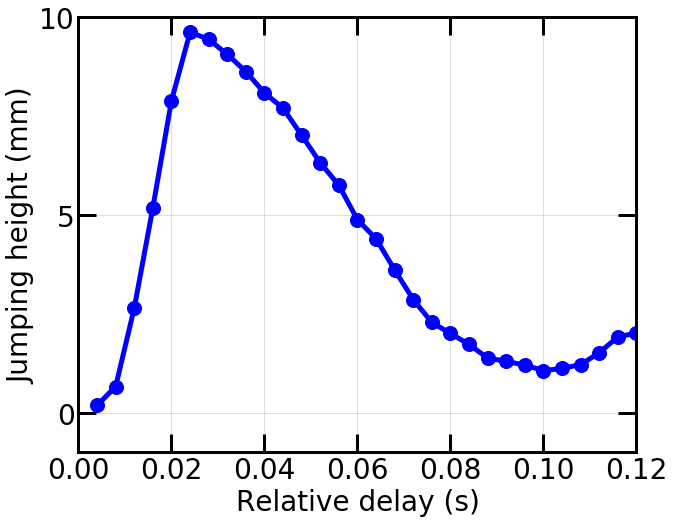

In [8]:
foldername = 'EfficientJumper_N_5_m_3-PeriodScan_12_13_2021_15_34'
delays, jumps = evaluate_plot(foldername=foldername)

In [10]:
delays[np.argmax(jumps)]

0.024

In [14]:
1.0 / (delays[np.argmax(jumps)] * 2)

20.833333333333332